## Extreme event categorising based on image clustering

https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34/

In [1]:
# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


2025-11-05 12:50:11.766534: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle
import glob

In [ ]:
#change experiment/folder to look at
exp = 'prect_6_clim/contour'
exp_label = exp.replace('/','_')

In [24]:
path = f"/div/nac/users/zofias/plots/XXN/{exp}/"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
maps = glob.glob(f'*.png')

In [ ]:
#check files read in
maps

['PRECT5day_6_r10_2061-07-14_61.73_10.0_contour.png',
 'PRECT5day_6_r10_2063-08-21_70.21_23.75_contour.png',
 'PRECT5day_6_r10_2068-06-29_70.21_23.75_contour.png',
 'PRECT5day_6_r10_2070-07-02_63.61_10.0_contour.png',
 'PRECT5day_6_r10_2092-06-08_69.27_25.0_contour.png',
 'PRECT5day_6_r10_2093-09-04_69.27_30.0_contour.png',
 'PRECT5day_6_r10_2095-06-19_69.27_18.75_contour.png',
 'PRECT5day_6_r10_2098-01-15_60.79_11.25_contour.png',
 'PRECT5day_6_r10_2098-06-25_63.61_10.0_contour.png',
 'PRECT5day_6_r11_2030-04-24_70.21_24.79_contour.png',
 'PRECT5day_6_r11_2036-06-06_61.73_10.0_contour.png',
 'PRECT5day_6_r11_2044-06-29_69.27_20.0_contour.png',
 'PRECT5day_6_r11_2071-11-16_60.79_11.25_contour.png',
 'PRECT5day_6_r11_2079-06-30_70.21_26.25_contour.png',
 'PRECT5day_6_r11_2081-08-05_69.57_26.98_contour.png',
 'PRECT5day_6_r11_2082-06-24_69.9_27.38_contour.png',
 'PRECT5day_6_r11_2090-07-14_65.97_14.38_contour.png',
 'PRECT5day_6_r11_2090-10-28_60.08_9.06_contour.png',
 'PRECT5day_6_r1_20

In [26]:
# load model
model = VGG16()
# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [27]:
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx)
    #print(features.shape)
    return features

In [28]:
data = {}
p = r"/div/nac/users/zofias/plots/XXN/graph_features.pkl"

# loop through each image in the dataset
for graph in maps:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(graph,model)
        data[graph] = feat
        
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
            
# get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)

# get the unique labels (from the flower_labels.csv)
#df = pd.read_csv('maps_labels.csv')
#label = df['label'].tolist()
#unique_labels = list(set(label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [29]:
#save the features
np.save(f"{path}/imageclustering_{exp_label}.npy", feat)

In [ ]:
# reduce the amount of dimensions in the feature vector
# will not work if number of files < n_components
pca = PCA(n_components=20, random_state=11)
pca.fit(feat)
x = pca.transform(feat)

In [31]:
#save the processed data
np.save(f"{path}/imageclustering_{exp_label}_processed_portrait.npy", x)

## Clustering

In [36]:
# load the processed data

#this is the data that looks like the 4000m 
#x = np.load(path+'imageclustering2000m_processed.npy')

#this is the data that is in portrait format
x = np.load(f"{path}/imageclustering_{exp_label}_processed_portrait.npy")


Text(0, 0.5, 'Sum of squared distance')

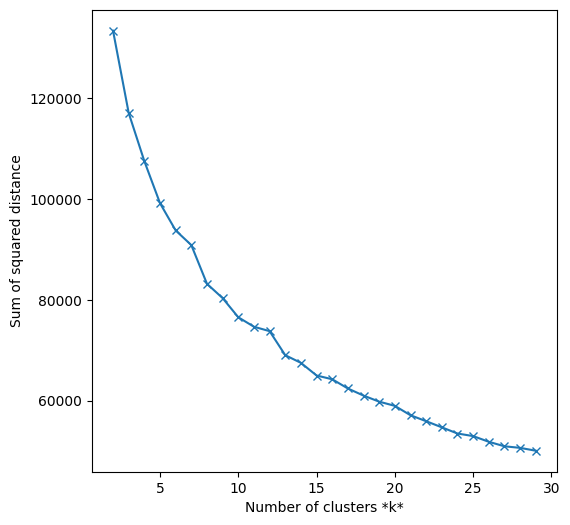

In [37]:
sse = []
list_k = list(range(2, 30))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22)
    km.fit(x)
   
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, marker="x")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
#plt.ylim(0,)

In [38]:
#change n_clusters to determine number of categories
kmeans = KMeans(n_clusters=4,random_state=7)
kmeans.fit(x)

# holds the cluster id and the images { id: [images] }
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)
        
for i in range(len(groups)):
    print(len(groups[i]))

59
49
57
74


In [39]:
groups[0]

[np.str_('trefhtmx14_5_r11_2077-05-29_68.76_20.26_single.png'),
 np.str_('trefhtmx14_5_r11_2081-07-05_60.18_8.56_single.png'),
 np.str_('trefhtmx14_5_r11_2089-08-06_64.76_13.47_single.png'),
 np.str_('trefhtmx14_5_r11_2093-07-29_60.36_9.15_single.png'),
 np.str_('trefhtmx14_5_r1_2081-07-21_62.91_11.15_single.png'),
 np.str_('trefhtmx14_5_r1_2098-08-03_59.84_8.12_single.png'),
 np.str_('trefhtmx14_5_r12_2099-07-21_59.84_10.0_single.png'),
 np.str_('trefhtmx14_5_r12_2099-07-25_58.9_7.5_single.png'),
 np.str_('trefhtmx14_5_r13_2074-08-05_60.16_7.5_single.png'),
 np.str_('trefhtmx14_5_r13_2079-07-13_60.22_9.54_single.png'),
 np.str_('trefhtmx14_5_r14_2100-05-30_68.32_18.75_single.png'),
 np.str_('trefhtmx14_5_r15_2097-07-08_59.84_10.0_single.png'),
 np.str_('trefhtmx14_5_r16_2093-07-04_61.41_7.64_single.png'),
 np.str_('trefhtmx14_5_r17_2055-06-26_58.9_7.5_single.png'),
 np.str_('trefhtmx14_5_r17_2092-07-13_62.29_10.5_single.png'),
 np.str_('trefhtmx14_5_r17_2100-07-12_60.13_7.75_single.pn

In [ ]:
# function that lets you view all images in a cluster (based on identifier)        
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 50 images to be shown at a time
    if len(files) > 50:
        print(f"Clipping cluster size from {len(files)} to 50")
        files = files[:49]
    # plot each image in the cluster
    for index, file in enumerate(files):
        plt.subplot(10,10,index+1);
        img = load_img(file)
        img = np.array(img)
        plt.imshow(img)
        plt.axis('off')

Clipping cluster size from 59 to 50


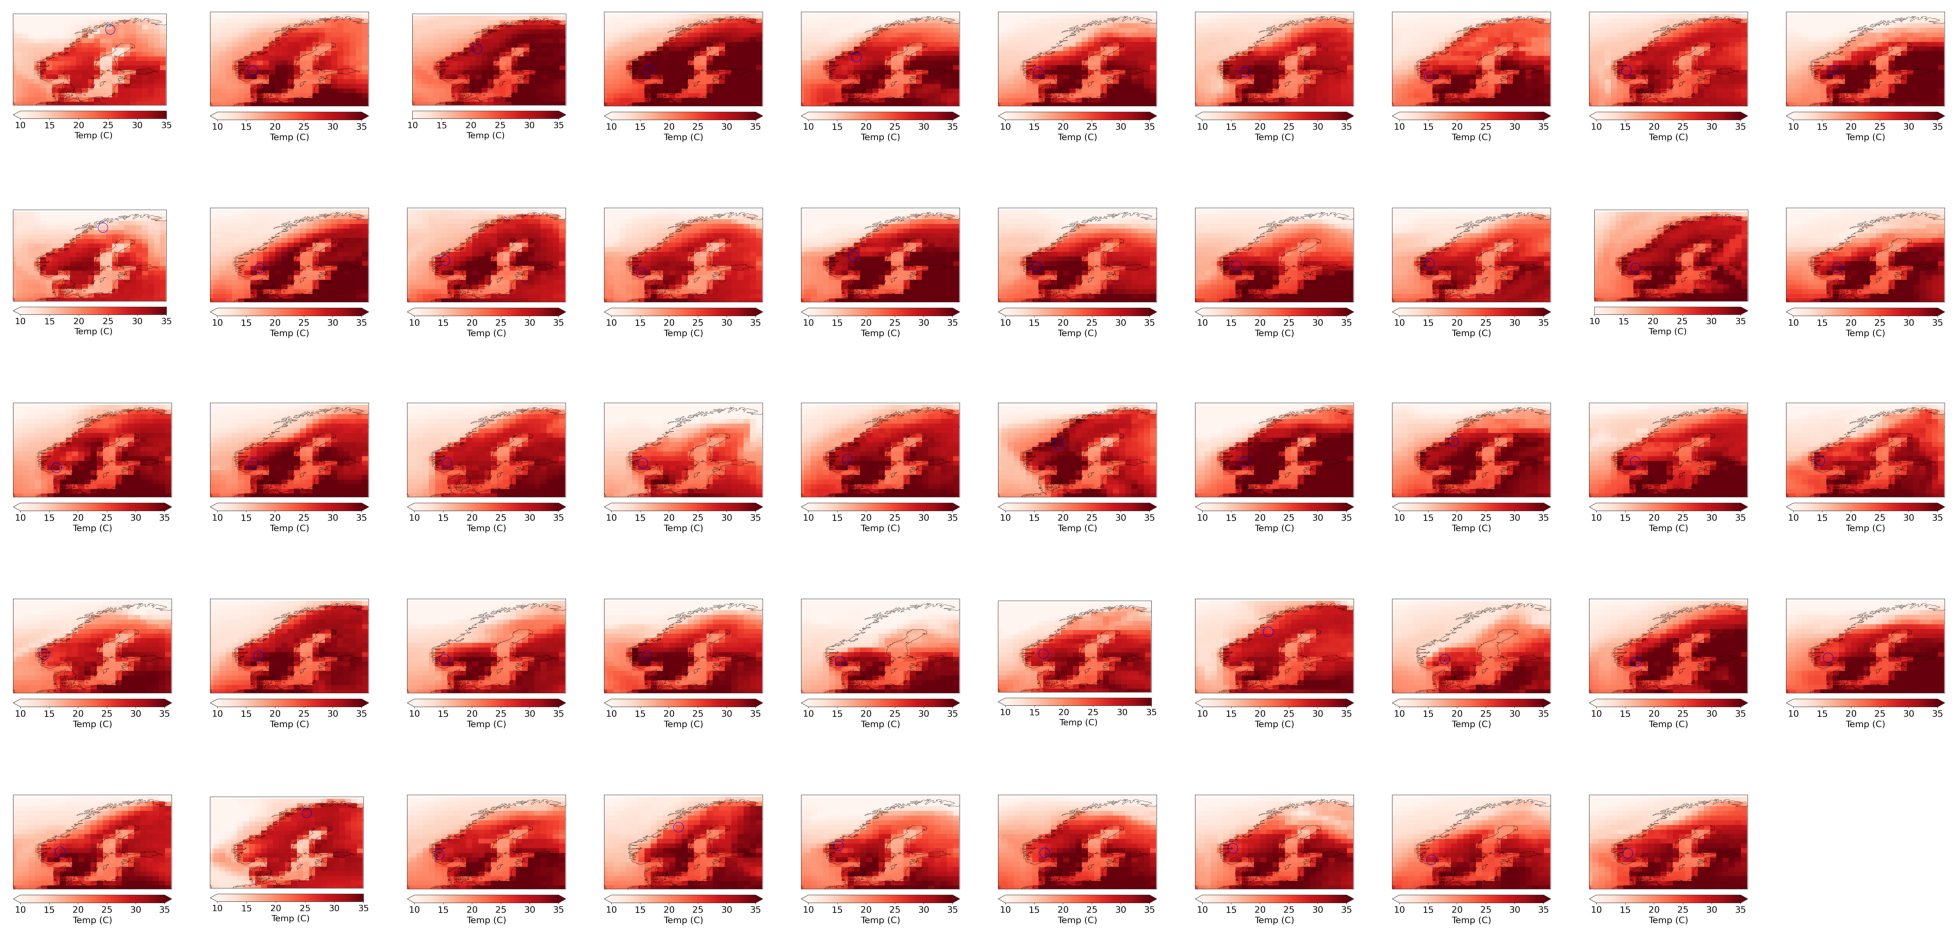

In [41]:
view_cluster(0)

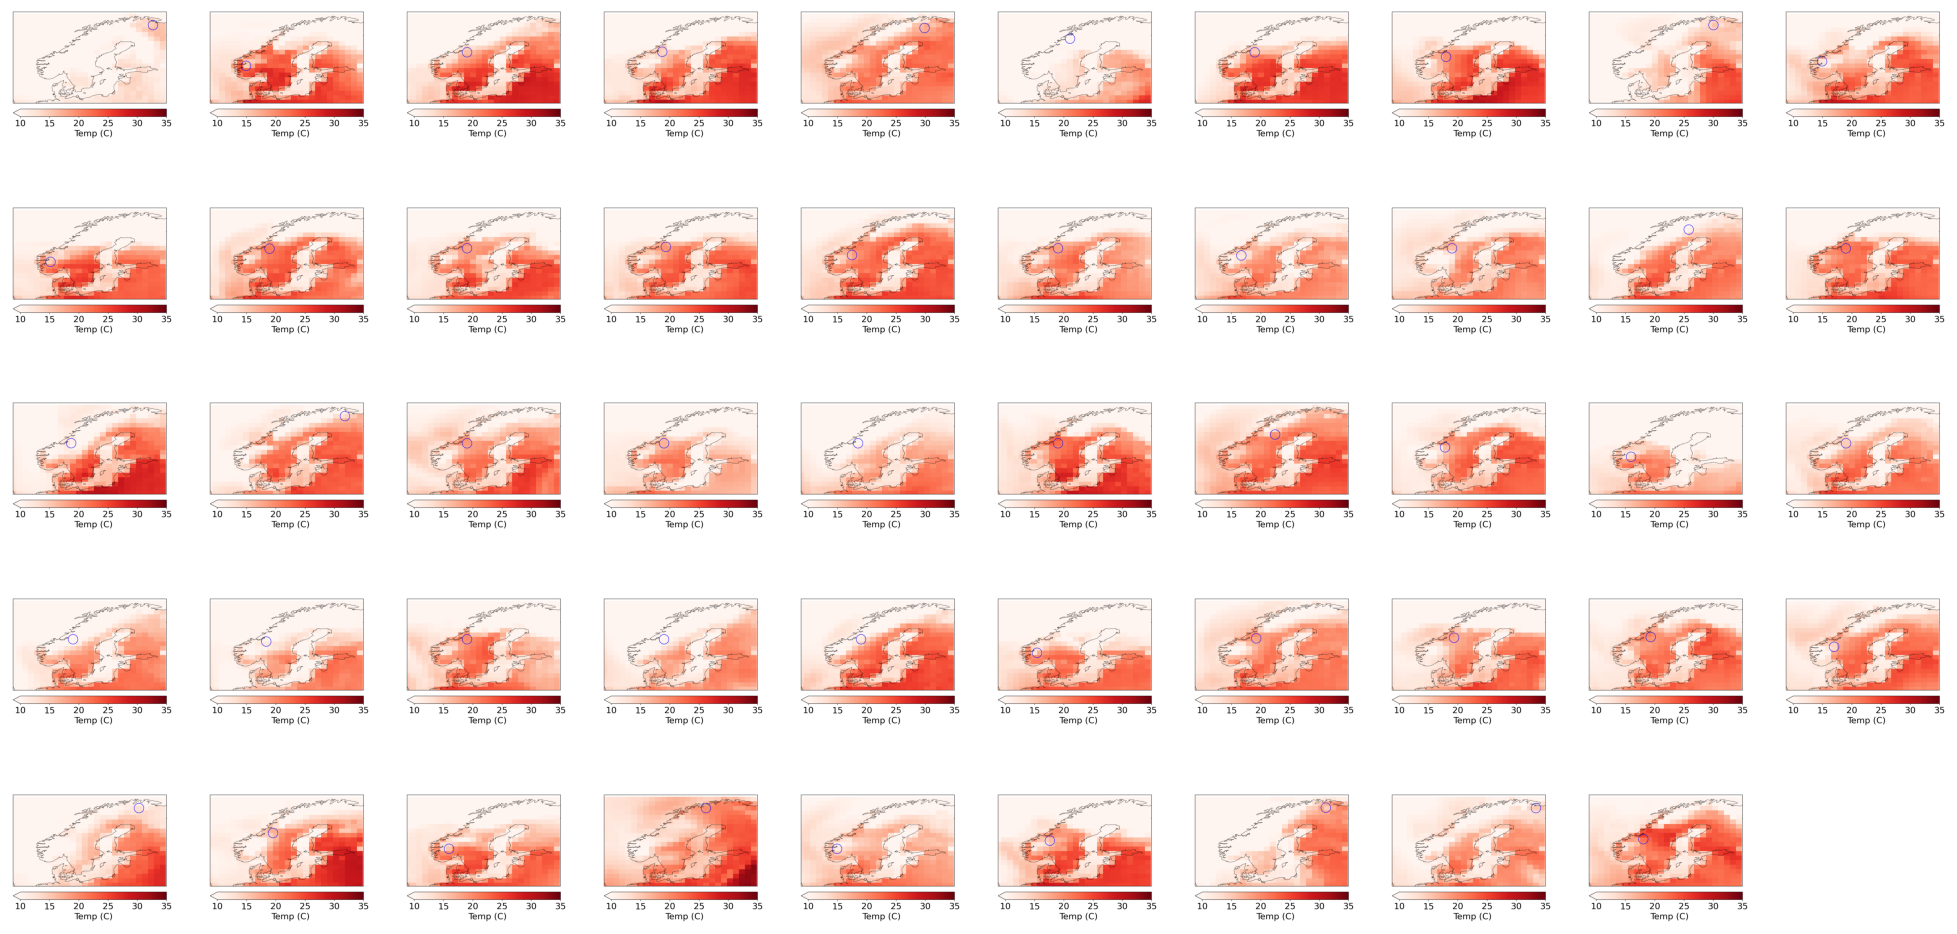

In [42]:
view_cluster(1)

Clipping cluster size from 57 to 50


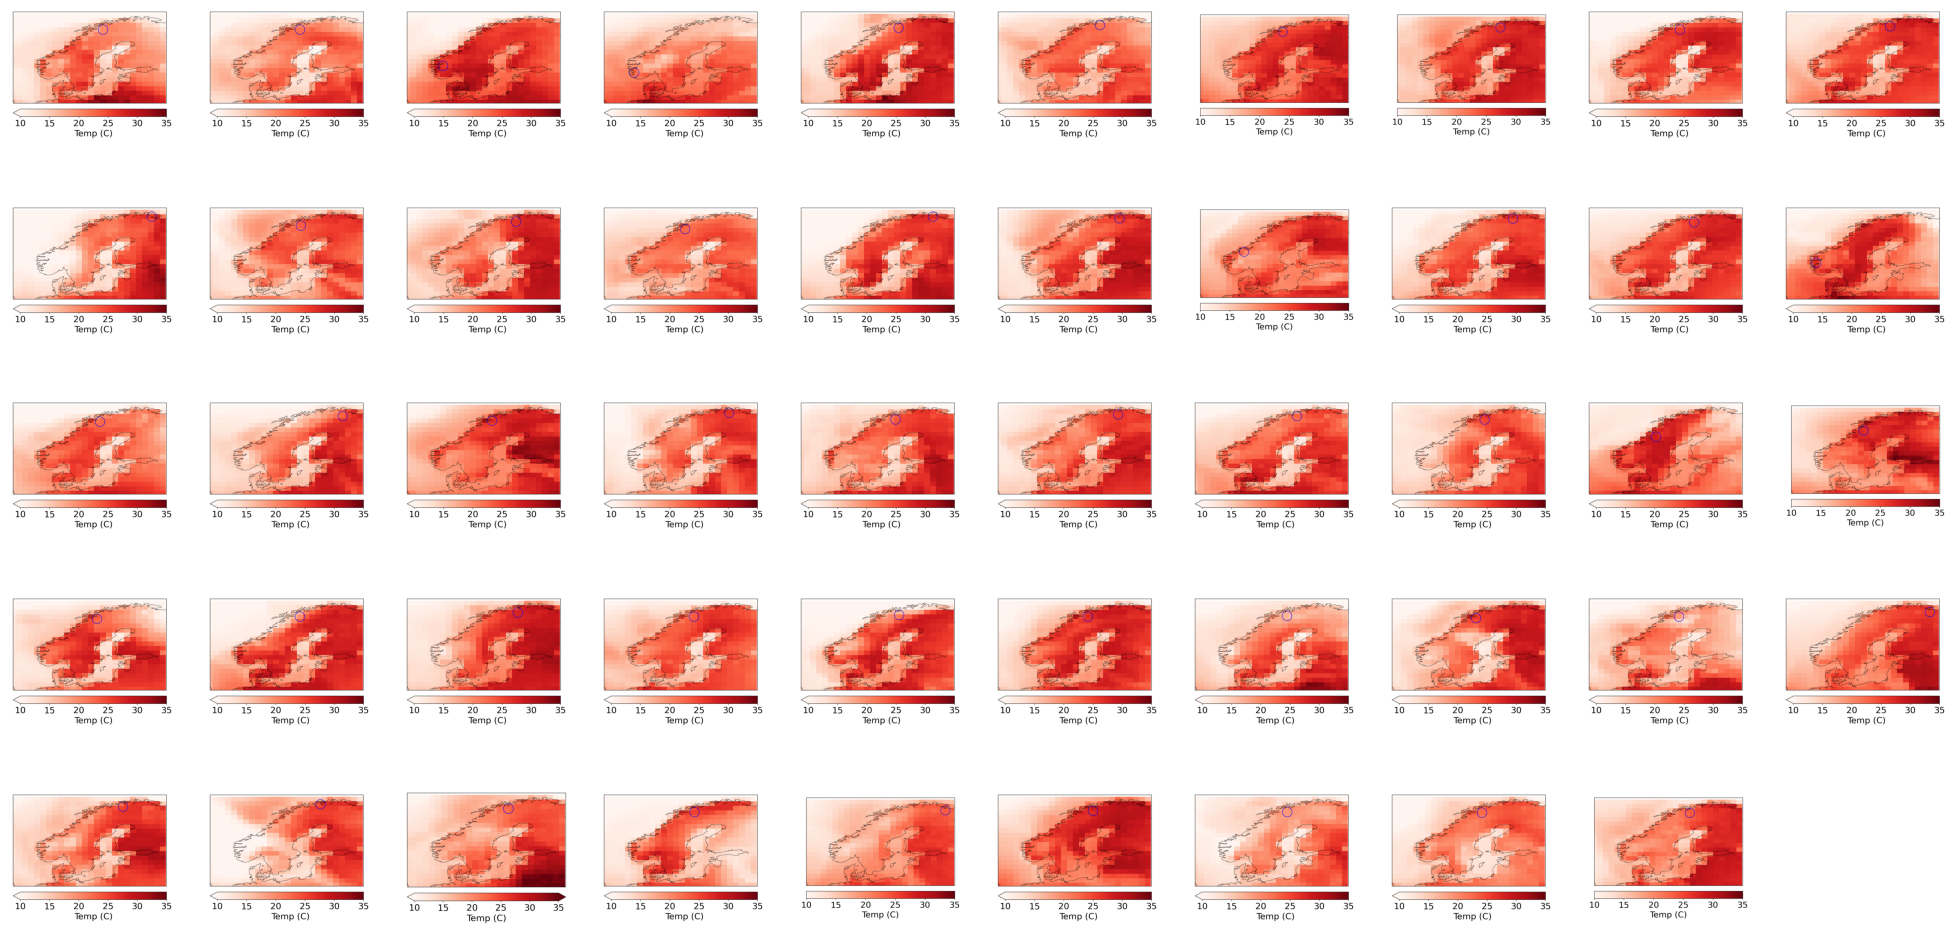

In [43]:
view_cluster(2)

Clipping cluster size from 74 to 50


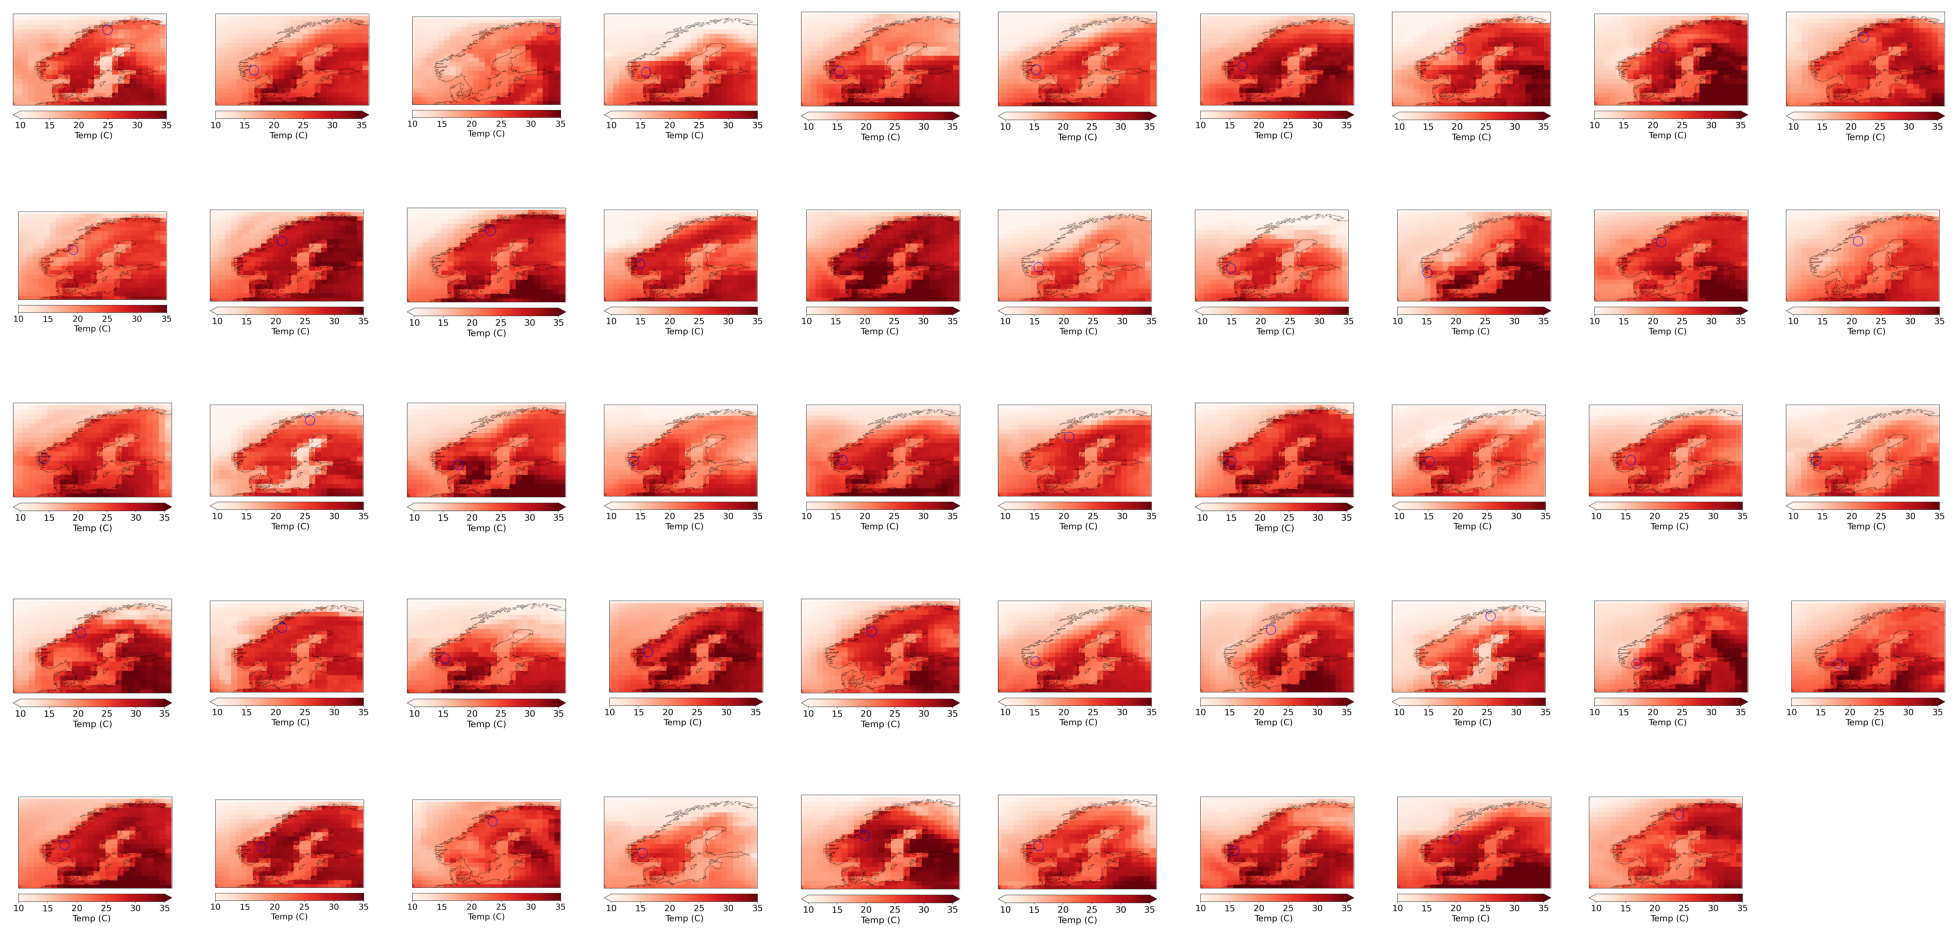

In [44]:
view_cluster(3)